# Qutrit Noise Channel Demo
This notebook demonstrates the effects of different noise channels on a qutrit.

## Setup and Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qnlib.noise import TritFlip, AmplitudeDamping, Depolarizing

def get_density_matrix(state):
    """Convert state vector to density matrix."""
    return np.outer(state, state.conj())

def apply_channel(rho, kraus_ops):
    """Apply noise channel using Kraus operators."""
    result = np.zeros_like(rho, dtype=complex)
    for K in kraus_ops:
        result += K @ rho @ K.conj().T
    return result

def plot_density_matrix(rho, ax, title):
    """Plot density matrix as a heatmap."""
    im = ax.imshow(np.real(rho), cmap='RdBu', vmin=-1, vmax=1)
    ax.set_title(title)
    for i in range(3):
        for j in range(3):
            ax.text(j, i, f'{rho[i,j]:.2f}', ha='center', va='center')
    return im

## Initial State Preparation
We prepare a qutrit in state |1⟩ (middle energy level) and create its density matrix representation.
The following noise channels are initialized:

1. **Trit Flip**: Similar to bit flip, but for 3-level systems
   - p_01: probability of 0↔1 flip (0.15)
   - p_02: probability of 0↔2 flip (0.05) 
   - p_12: probability of 1↔2 flip (0.10)

2. **Amplitude Damping**: Models energy decay between levels
   - gamma_10: decay rate from |1⟩ to |0⟩ (0.3)
   - gamma_20: decay rate from |2⟩ to |0⟩ (0.1)
   - gamma_21: decay rate from |2⟩ to |1⟩ (0.1)

3. **Depolarizing**: Uniformly mixes the state
   - p: depolarizing probability (0.5)

In [2]:
# Initial state
psi = np.array([0, 1, 0])
rho = get_density_matrix(psi)

# Create noise channels
trit_flip = TritFlip(p_01=0.15, p_02=0.05, p_12=0.1)
amp_damp = AmplitudeDamping(gamma_10=0.3, gamma_20=0.1, gamma_21=0.1)
depol = Depolarizing(p=0.5)

## Visualization
The density matrices are visualized as heatmaps:
- Red indicates positive values
- Blue indicates negative values
- The intensity represents the magnitude
- Diagonal elements show population probabilities
- Off-diagonal elements show quantum coherences

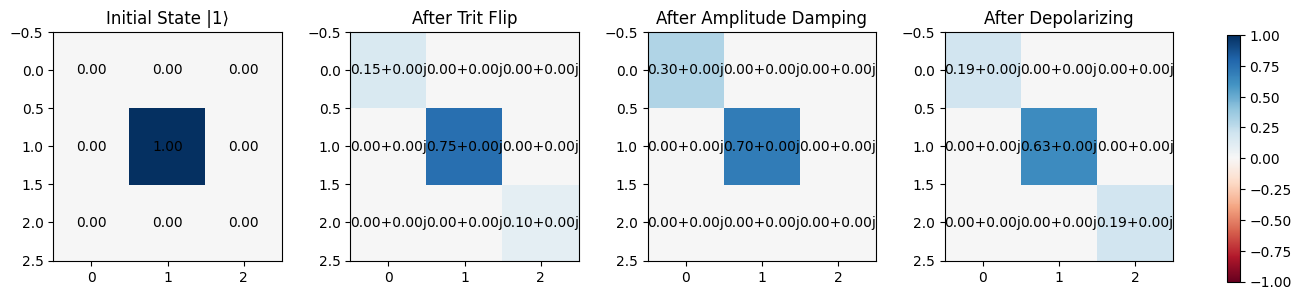

In [3]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Plot initial state
im = plot_density_matrix(rho, axes[0], 'Initial State |1⟩')

rho_tf = apply_channel(rho, trit_flip._kraus_())
plot_density_matrix(rho_tf, axes[1], 'After Trit Flip')

rho_ad = apply_channel(rho, amp_damp._kraus_())
plot_density_matrix(rho_ad, axes[2], 'After Amplitude Damping')

rho_dp = apply_channel(rho, depol._kraus_())
plot_density_matrix(rho_dp, axes[3], 'After Depolarizing')

cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.8)

plt.subplots_adjust(
    left=0.05,  
    right=0.75, 
    bottom=0.15, 
    top=0.9,    
    wspace=0.3  
)

plt.show()

## Population Analysis
The diagonal elements of each density matrix show the probability distribution across the three levels |0⟩, |1⟩, and |2⟩.
- Initial state is pure |1⟩
- Trit Flip redistributes population between levels
- Amplitude Damping shows decay to lower energy states
- Depolarizing tends toward equal populations

In [4]:
# Print state probabilities
def print_probabilities(rho, name):
    probs = np.real(np.diag(rho))
    print(f"\n{name} probabilities:")
    for i, p in enumerate(probs):
        print(f"|{i}⟩: {p:.3f}")

print_probabilities(rho, "Initial")
print_probabilities(rho_tf, "Trit Flip")
print_probabilities(rho_ad, "Amplitude Damping")
print_probabilities(rho_dp, "Depolarizing")


Initial probabilities:
|0⟩: 0.000
|1⟩: 1.000
|2⟩: 0.000

Trit Flip probabilities:
|0⟩: 0.150
|1⟩: 0.750
|2⟩: 0.100

Amplitude Damping probabilities:
|0⟩: 0.300
|1⟩: 0.700
|2⟩: 0.000

Depolarizing probabilities:
|0⟩: 0.188
|1⟩: 0.625
|2⟩: 0.188
